# FIT5202 Assignment 2A : Building models to predict future eCommerce sales

## Table of Contents
*  
    * [Part 1 : Data Loading, Transformation and Exploration](#part-1)
    * [Part 2 : Feature extraction and ML training](#part-2)
    * [Part 3 : Customer Segmentation and Knowledge sharing with K-Mean](#part-3)
    * [Part 4 : Data Ethics, Privacy, and Security](#part-4)
 
Please add code/markdown cells as you need.

# Part 1: Data Loading, Transformation and Exploration <a class="anchor" name="part-1"></a>
## 1.1 Data Loading
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to process the data. Usage of Spark SQL is discouraged, and your can only use pandas to format results. For plotting, different visualisation packages can be used, but please ensure that you have included instructions to install the additional packages and the installation will be successful in the provided docker container(in case your marker needs to clear the notebook and rerun it).

### 1.1.1 Data Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkSession. For creating the SparkSession, you need to use a SparkConf object to configure the Spark app with a proper application name, to ensure the maximum partition size not exceed 20MB, and to run locally with all CPU cores on your machine (note: if you have insufficient RAM, reducing the number of cores is also acceptable.)

In [1]:
# importing needed libraries
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

# creating a sparkconf object to configure spark
spark_conf = (
    SparkConf()
    .setAppName("MOTH E-commerce Customer Transaction analysis")
    .set("spark.sql.files.maxPartitionBytes", "20MB")
    .setMaster("local[*]")
)

# setting the spark session based on the spark conf object created
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

# ensuring the spark is created successfully
spark

1.1.2 Write code to define the schemas for category, customer, product, clickstream and transaction datasets, following the data types suggested in the metadata file.

In [2]:
# importing packages to define schemas for the datasets based on the metadata
from pyspark.sql.types import (
    StructType,
    StructField,
    IntegerType,
    StringType,
    DoubleType,
    TimestampType,
    DateType,
)

# defining the schema for category schema
category_schema = StructType(
    [
        StructField("index", IntegerType(), False),
        StructField("category_id", IntegerType(), False),
        StructField("cat_level1", StringType(), True),
        StructField("cat_level2", StringType(), True),
        StructField("cat_level3", StringType(), True),
    ]
)

# defining for customer schema
customer_schema = StructType(
    [
        StructField("index", IntegerType(), False),
        StructField("customer_id", IntegerType(), False),
        StructField("first_name", StringType(), True),
        StructField("last_name", StringType(), True),
        StructField("username", StringType(), True),
        StructField("email", StringType(), True),
        StructField("gender", StringType(), True),
        StructField("birthdate", DateType(), True),
        StructField("device_type", StringType(), True),
        StructField("device_id", StringType(), True),
        StructField("device_version", StringType(), True),
        StructField("home_location_lat", DoubleType(), True),
        StructField("home_location_long", DoubleType(), True),
        StructField("home_location", StringType(), True),
        StructField("home_country", StringType(), True),
        StructField("first_join_date", DateType(), True),
    ]
)

# defining the product schema
product_schema = StructType(
    [
        StructField("index", IntegerType(), False),
        StructField("product_id", IntegerType(), False),
        StructField("gender", StringType(), True),
        StructField("baseColour", StringType(), True),
        StructField("season", StringType(), True),
        StructField("year", IntegerType(), True),
        StructField("usage", StringType(), True),
        StructField("productDisplayName", StringType(), True),
        StructField("category_id", IntegerType(), True),
    ]
)

# defining clisk_stream schema
click_schema = StructType(
    [
        StructField("index", IntegerType(), False),
        StructField("session_id", StringType(), False),
        StructField("event_name", StringType(), True),
        StructField("event_time", TimestampType(), True),
        StructField("event_id", StringType(), True),
        StructField("traffic_source", StringType(), True),
        StructField("event_metadata", StringType(), True),
    ]
)

# defining the transaction schema
transaction_schema = StructType(
    [
        StructField("index", IntegerType(), False),
        StructField("created_at", TimestampType(), True),
        StructField("customer_id", IntegerType(), True),
        StructField("booking_id", StringType(), False),
        StructField("session_id", StringType(), True),
        StructField("product_metadata", StringType(), True),
        StructField("payment_method", StringType(), True),
        StructField("payment_status", StringType(), True),
        StructField("promo_amount", DoubleType(), True),
        StructField("promo_code", StringType(), True),
        StructField("shipment_fee", DoubleType(), True),
        StructField("shipment_date_limit", DateType(), True),
        StructField("shipment_location_lat", DoubleType(), True),
        StructField("shipment_location_long", DoubleType(), True),
        StructField("total_amount", DoubleType(), True),
    ]
)

1.1.3 Using predefined schema, write code to load the csv files into separate dataframes. Print the schemas of all dataframes.

In [3]:
# defining the parts for each file
category_path = "a2a_dataset/category.csv"
customer_path = "a2a_dataset/customer.csv"
product_path = "a2a_dataset/product.csv"
cust_session_path = "a2a_dataset/customer_session.csv"
clickstream_path = "click_stream.csv"
transaction_path = "new_transactions.csv"

# reading the files based on the above schema and loading them into seperate dataframes
category_df = (
    spark.read.format("csv")
    .option("header", True)
    .schema(category_schema)
    .load(category_path)
)
customer_df = (
    spark.read.format("csv")
    .option("header", "true")
    .schema(customer_schema)
    .load(customer_path)
)
product_df = (
    spark.read.format("csv")
    .option("header", "true")
    .schema(product_schema)
    .load(product_path)
)
clickstream_df = (
    spark.read.format("csv")
    .option("header", "true")
    .schema(click_schema)
    .load(clickstream_path)
)
transaction_df = (
    spark.read.format("csv")
    .option("header", "true")
    .schema(transaction_schema)
    .load(transaction_path)
)
cust_session_df = (
    spark.read.format("csv").option("header", "true").load(cust_session_path)
)

print("Category Schema: ")
category_df.printSchema()
print("Customer Schema: ")
customer_df.printSchema()
print("Product Schema: ")
product_df.printSchema()
print("Click Stream Schema: ")
clickstream_df.printSchema()
print("Transaction Schema: ")
transaction_df.printSchema()
print("Customer Session Schema: ")
cust_session_df.printSchema()

Category Schema: 
root
 |-- index: integer (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- cat_level1: string (nullable = true)
 |-- cat_level2: string (nullable = true)
 |-- cat_level3: string (nullable = true)

Customer Schema: 
root
 |-- index: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- username: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthdate: date (nullable = true)
 |-- device_type: string (nullable = true)
 |-- device_id: string (nullable = true)
 |-- device_version: string (nullable = true)
 |-- home_location_lat: double (nullable = true)
 |-- home_location_long: double (nullable = true)
 |-- home_location: string (nullable = true)
 |-- home_country: string (nullable = true)
 |-- first_join_date: date (nullable = true)

Product Schema: 
root
 |-- index: integer (nullable = true)
 |

### 1.2 Data Transformation to Create Features <a class="anchor" name="1.2"></a>
In the clickstream dataset, there are 9 types of events:  
VIEW_PROMO, SCROLL, ADD_PROMO, VIEW_ITEM, CLICK, PURCHASE, ADD_TO_CART, HOMEPAGE, SEARCH  
We categorize them into 3 different categories:  
Category 1(high value actions - highly likely to purchase): ADD_PROMO, ADD_TO_CART  
Category 2(medium value actions - likely to purchase): VIEW_PROMO, VIEW_ITEM, SEARCH  
Category 3(low value actions - just browsing):  SCROLL, HOMEPAGE, CLICK  
Perform the following tasks based on the clickstream dataframe and create a new dataframe.  

#### Create features based on the requirment in the assignment

In [5]:
from pyspark.sql import functions as F

# defining categories based on the above
biferations = {
    "Category 1": ["ADD_PROMO", "ADD_TO_CART"],  # highly likely
    "Category 2": ["VIEW_PROMO", "VIEW_ITEM", "SEARCH"],  # likey
    "Category 3": ["SCROLL", "HOMEPAGE", "CLICK"],  # browsing
}

# creating a new column
clickstream_df = clickstream_df.withColumn(
    "event_category",
    F.when(F.col("event_name").isin(biferations["Category 1"]), "Category 1")
    .when(F.col("event_name").isin(biferations["Category 2"]), "Category 2")
    .when(F.col("event_name").isin(biferations["Category 3"]), "Category 3")
    .otherwise("Unknown"),
)

# viewing the df
clickstream_df.show(5)

+-----+--------------------+-----------+--------------------+--------------------+--------------+--------------------+--------------+
|index|          session_id| event_name|          event_time|            event_id|traffic_source|      event_metadata|event_category|
+-----+--------------------+-----------+--------------------+--------------------+--------------+--------------------+--------------+
|    1|fb0abf9e-fd1a-44d...|   HOMEPAGE|2019-09-06 15:54:...|9c4388c4-c95b-467...|        MOBILE|                null|    Category 3|
|    2|fb0abf9e-fd1a-44d...|     SCROLL|2019-09-06 16:03:...|4690e1f5-3f99-42d...|        MOBILE|                null|    Category 3|
|    3|7d440441-e67a-4d3...|   HOMEPAGE|2019-09-01 12:05:...|88aeaeb5-ec98-485...|        MOBILE|                null|    Category 3|
|    4|7d440441-e67a-4d3...|ADD_TO_CART|2019-09-01 12:06:...|934e306e-ecc6-472...|        MOBILE|{'product_id': 15...|    Category 1|
|    5|7d440441-e67a-4d3...|     SEARCH|2019-09-01 12:07:...|c

1.2.1 For each unique session_id, count the number of actions in each category and create 3 columns(num_cat_highvalue, num_cat_midvalue, num_cat_lowvalue).

In [6]:
from pyspark.sql.functions import when, col, sum

# creating new columns based on the categories stated to aggregate actions based on session IDs
feature_df = clickstream_df.groupBy("session_id").agg(
    sum(when(col("event_category") == "Category 1", 1).otherwise(0)).alias(
        "num_cat_highvalue"
    ),
    sum(when(col("event_category") == "Category 2", 1).otherwise(0)).alias(
        "num_cat_midvalue"
    ),
    sum(when(col("event_category") == "Category 3", 1).otherwise(0)).alias(
        "num_cat_lowvalue"
    ),
)

# printing the df
feature_df.show(5)

+--------------------+-----------------+----------------+----------------+
|          session_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|
+--------------------+-----------------+----------------+----------------+
|2fdb7762-98d5-432...|                1|               2|               2|
|e7f689a1-28a0-4fe...|                1|               1|               3|
|2faff3e1-25cf-438...|                2|               6|              13|
|3f2d99e1-51ff-402...|                1|               0|               2|
|5386d3f4-98ea-448...|                2|               9|              18|
+--------------------+-----------------+----------------+----------------+
only showing top 5 rows



1.2.2. Create 2 columns with percentage ratio of high value action and low value actions. (i.e. high value ratio = (count of high value actions)/(total actions) * 100%)

In [8]:
from pyspark.sql.functions import col, round

# calculation of total actions based on the categorisation
feature_df = feature_df.withColumn(
    "total",
    col("num_cat_highvalue") + col("num_cat_midvalue") + col("num_cat_lowvalue"),
)

# calculation of percentage for high value actions
feature_df = feature_df.withColumn(
    "high_value_ratio", round((col("num_cat_highvalue") / col("total")) * 100, 2)
)

# calculation of percentage for low value actions
feature_df = feature_df.withColumn(
    "low_value_ratio", round((col("num_cat_lowvalue") / col("total")) * 100, 2)
)

# removing the total column
feature_df = feature_df.drop("total")

# printing the df
feature_df.show(5)

+--------------------+-----------------+----------------+----------------+----------------+---------------+
|          session_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|
+--------------------+-----------------+----------------+----------------+----------------+---------------+
|2fdb7762-98d5-432...|                1|               2|               2|            20.0|           40.0|
|e7f689a1-28a0-4fe...|                1|               1|               3|            20.0|           60.0|
|2faff3e1-25cf-438...|                2|               6|              13|            9.52|           61.9|
|3f2d99e1-51ff-402...|                1|               0|               2|           33.33|          66.67|
|5386d3f4-98ea-448...|                2|               9|              18|             6.9|          62.07|
+--------------------+-----------------+----------------+----------------+----------------+---------------+
only showing top 5 rows



1.2.3 Create a new column “is_promotion” with value of 1 or 0 and add to feature_df. If there are “ADD_PROMO” actions in a session, set it to 1, otherwise 0.

In [9]:
from pyspark.sql.functions import when, lit

# creating a new dataframe to understand if ADD_PROMO exists for every unique session ID in clickstream_df
promo_df = (
    clickstream_df.filter(clickstream_df.event_name == "ADD_PROMO")
    .select("session_id")
    .distinct()
    .withColumn("is_promotion", lit(1))
)

# promo_df.show(truncate = False)

# adding this to feature_df as a new column
feature_df = feature_df.join(
    promo_df.select("session_id", "is_promotion"), on="session_id", how="left"
)

# ensuring 0 is placed if a promo action does not exist
feature_df = feature_df.fillna(0, subset=["is_promotion"])

feature_df.show(5)

+--------------------+-----------------+----------------+----------------+----------------+---------------+------------+
|          session_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|
+--------------------+-----------------+----------------+----------------+----------------+---------------+------------+
|2faff3e1-25cf-438...|                2|               6|              13|            9.52|           61.9|           1|
|2fdb7762-98d5-432...|                1|               2|               2|            20.0|           40.0|           0|
|30f85513-ceae-452...|                1|               2|               2|            20.0|           40.0|           0|
|3f2d99e1-51ff-402...|                1|               0|               2|           33.33|          66.67|           0|
|5386d3f4-98ea-448...|                2|               9|              18|             6.9|          62.07|           1|
+--------------------+----------

1.2.4 For each unique session_id, base on event_time, extract the season. (note: The dataset is from Indonesia, Spring: Mar-May, Summer: Jun-Aug, Autumn: Sep-Nov, Winter: Dec-Feb)

In [10]:
# identifying the start and end of each session
from pyspark.sql import functions as f

# grouping by session_id and calculating session time
session_time_df = clickstream_df.groupBy("session_id").agg(
    F.min("event_time").alias("session_start"), F.max("event_time").alias("session_end")
)

session_time_df.show(truncate=False)

+------------------------------------+--------------------------+--------------------------+
|session_id                          |session_start             |session_end               |
+------------------------------------+--------------------------+--------------------------+
|2fdb7762-98d5-4324-ba49-e71164b44ff9|2021-04-23 18:15:20.425431|2021-04-24 03:58:29.425431|
|e7f689a1-28a0-4fe7-9e12-c40f9fcc9b0f|2018-04-25 07:57:28.011776|2018-04-26 11:02:52.011776|
|2faff3e1-25cf-438f-a81e-4f0c5878bc4e|2019-09-25 18:51:03.011776|2019-09-28 09:28:53.011776|
|3f2d99e1-51ff-402a-a831-02f3c68cbc39|2021-03-21 07:17:02.011776|2021-03-21 11:41:50.011776|
|5386d3f4-98ea-448c-bdf3-88d55877fc52|2021-12-01 22:03:22.011776|2021-12-06 03:48:24.011776|
|30f85513-ceae-4527-b59f-a4b79a6ed2ab|2022-07-09 15:49:05.315667|2022-07-12 01:33:20.315667|
|fd129bab-a0f5-4cb0-903b-3bcdebf2a5fe|2017-03-20 09:07:50.459435|2017-03-21 23:00:37.459435|
|ca5a180c-89c0-4650-a321-1443326dbaaf|2018-03-28 01:29:29.459435|2018-

In [11]:
from pyspark.sql.functions import month, when, concat_ws

# extracting the month based on which season should be estimated
session_time_df = session_time_df.withColumn("start_month", month("session_start"))
session_time_df = session_time_df.withColumn("end_month", month("session_end"))

# calculation of month
session_time_df = session_time_df.withColumn(
    "session_month",
    when(
        session_time_df["start_month"]
        == session_time_df["end_month"],  # if session start and end month is the same
        concat_ws("-", session_time_df["start_month"]),
    )  # take the start month
    # if not the same, then taking the ending month consideering the the customer is shopping for the upcomming season
    .otherwise(concat_ws("-", session_time_df["end_month"])),
)

session_time_df.show(truncate=False)

+------------------------------------+--------------------------+--------------------------+-----------+---------+-------------+
|session_id                          |session_start             |session_end               |start_month|end_month|session_month|
+------------------------------------+--------------------------+--------------------------+-----------+---------+-------------+
|2fdb7762-98d5-4324-ba49-e71164b44ff9|2021-04-23 18:15:20.425431|2021-04-24 03:58:29.425431|4          |4        |4            |
|e7f689a1-28a0-4fe7-9e12-c40f9fcc9b0f|2018-04-25 07:57:28.011776|2018-04-26 11:02:52.011776|4          |4        |4            |
|2faff3e1-25cf-438f-a81e-4f0c5878bc4e|2019-09-25 18:51:03.011776|2019-09-28 09:28:53.011776|9          |9        |9            |
|3f2d99e1-51ff-402a-a831-02f3c68cbc39|2021-03-21 07:17:02.011776|2021-03-21 11:41:50.011776|3          |3        |3            |
|5386d3f4-98ea-448c-bdf3-88d55877fc52|2021-12-01 22:03:22.011776|2021-12-06 03:48:24.011776|12   

In [12]:
# assigning season based on month
session_time_df = session_time_df.withColumn(
    "session_season",
    when((col("session_month") >= 3) & (col("session_month") <= 5), "Spring")
    .when((col("session_month") >= 6) & (col("session_month") <= 8), "Summer")
    .when((col("session_month") >= 9) & (col("session_month") <= 11), "Autumn")
    .otherwise("Winter"),
)

# session_time_df.show()

# joining feature_df and the above mentioned df
feature_df = feature_df.join(
    session_time_df.select("session_id", "session_season"), on="session_id"
)
# printing the df
feature_df.show(truncate=False)

+------------------------------------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+
|session_id                          |num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|
+------------------------------------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+
|00005746-17ec-449c-9c5c-699a3ea9304a|1                |20              |44              |1.54            |67.69          |0           |Spring        |
|0000a729-3de3-4613-9022-d12b7fa06e75|2                |0               |2               |50.0            |50.0           |0           |Spring        |
|000128d0-c51c-411b-88e6-0cf5d9642d2d|2                |6               |6               |14.29           |42.86          |0           |Summer        |
|000130b9-07d1-4374-99b8-89d769c46c9f|1                |11              |34             

1.2.5 Join tables to find customer information and add columns to feature_df: gender, age, device type, home_location, first join year. (note: For some column, you need to perform transformation. For age, keep integer only.)

In [13]:
from pyspark.sql.functions import datediff, current_date, round

# calculating age in customer_df
customer_df = customer_df.withColumn(
    "age",
    (datediff(current_date(), customer_df["birthdate"]) / 365.25).cast(
        "integer"
    ),  # calculating in years
)

# viewing age mainly
customer_df.select("customer_id", "birthdate", "age").show(truncate=False)

+-----------+----------+---+
|customer_id|birthdate |age|
+-----------+----------+---+
|2870       |1996-06-14|27 |
|8193       |1993-08-16|30 |
|7279       |1989-01-23|34 |
|88813      |1991-01-05|32 |
|82542      |2000-07-15|23 |
|5440       |1989-01-09|34 |
|90319      |1990-01-12|33 |
|96453      |2005-02-12|18 |
|8031       |1995-11-01|27 |
|61533      |1987-02-28|36 |
|72203      |1982-04-30|41 |
|74362      |1996-03-30|27 |
|9152       |1995-12-10|27 |
|22199      |1986-07-02|37 |
|94370      |1998-06-28|25 |
|73093      |1992-01-06|31 |
|72106      |2001-02-23|22 |
|97883      |1999-08-24|24 |
|3434       |1998-01-18|25 |
|31163      |2003-04-11|20 |
+-----------+----------+---+
only showing top 20 rows



In [14]:
# joining feature_df and customer_session_df to get customer_id
feature_df = feature_df.join(
    cust_session_df.select("session_id", "customer_id"), on="session_id", how="left"
)

# feature_df.show(truncate = False)

# Now that we have customer_id, joining required details from customer_df to feature_df
feature_df = feature_df.join(
    customer_df.select(
        "customer_id",
        "gender",
        "age",
        "device_type",
        "home_location",
        "first_join_date",
    ),
    on="customer_id",
    how="left",
)

feature_df.show(truncate=False)

+-----------+------------------------------------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+-------------------+---------------+
|customer_id|session_id                          |num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|home_location      |first_join_date|
+-----------+------------------------------------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+-------------------+---------------+
|25255      |00005746-17ec-449c-9c5c-699a3ea9304a|1                |20              |44              |1.54            |67.69          |0           |Spring        |M     |21 |Android    |Jakarta Raya       |2020-06-15     |
|2607       |0000a729-3de3-4613-9022-d12b7fa06e75|2                |0               |2               |50.0  

1.2.6 Join tables to find out if the customer made purchase or not, and add to feature_df as 1 or 0. We will use this column as training label later.

In [15]:
# adding a payment_success column to the transaction_df to indicate successful transaction
transaction_df = transaction_df.withColumn(
    "purchase_success", when(col("payment_status") == "Success", 1).otherwise(0)
)

# joining this table with feature_df to add the payment_success column
feature_df = feature_df.join(
    transaction_df.select("session_id", "purchase_success"), on="session_id", how="left"
)

feature_df.show(5)

+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+-------------+---------------+----------------+
|          session_id|customer_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|home_location|first_join_date|purchase_success|
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+-------------+---------------+----------------+
|00005746-17ec-449...|      25255|                1|              20|              44|            1.54|          67.69|           0|        Spring|     M| 21|    Android| Jakarta Raya|     2020-06-15|               0|
|0000a729-3de3-461...|       2607|                2|               0|               2|            50.0|           50.0|         

### 1.3 Exploring the Data <a class="anchor" name="1.3"></a>
**1.3.1 With the feature_df, write code to show the basic statistics: a) For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, 75 percentile; b)For each non-numeric column, display the top-5 values and the corresponding counts; c) For each boolean column, display the value and count.**

#### Getting the statistics for the numeric columns in feature_df: 
For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, 75 percentile;

In [16]:
# showing summary statistics for numerical columns (not binary columns)
feature_df.select(
    "num_cat_highvalue",
    "num_cat_midvalue",
    "num_cat_lowvalue",
    "high_value_ratio",
    "low_value_ratio",
    "age",
).summary("count", "mean", "stddev", "min", "max", "25%", "50%", "75%").show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary| num_cat_highvalue|  num_cat_midvalue|  num_cat_lowvalue|  high_value_ratio|   low_value_ratio|              age|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|            895203|            895203|            895203|            895203|            895203|           852582|
|   mean| 2.528691257737072|3.4278180479734766|7.4270696143779675|26.122444194223384|52.464819242116015|27.14689026979223|
| stddev|2.2999561060121776| 4.475989272102906| 9.239566040509834|17.578111677835775|16.545809924504628|7.286551743061923|
|    min|                 0|                 0|                 1|               0.0|              1.82|                7|
|    max|                53|               157|               512|             96.67|             100.0|               69|
|    25%|       

#### For each non-numeric column, display the top-5 values and the corresponding counts

In [17]:
from pyspark.sql.functions import col, desc

# identifying non-numeric columns
non_num_cols = [
    col_name
    for col_name, col_type in feature_df.dtypes
    if col_type in ["string", "date"]
]

for col_name in non_num_cols:
    # taking count of each occurance and then ordering it in decreasing fashion
    top_vals = feature_df.groupBy(col_name).count().orderBy(desc("count")).limit(5)
    print(f"Top 5 values in {col_name}: ")
    top_vals.show()

Top 5 values in session_id: 
+--------------------+-----+
|          session_id|count|
+--------------------+-----+
|00003eca-954b-415...|    1|
|00008762-b685-4f9...|    1|
|00001f29-3ede-444...|    1|
|00008e68-a4d4-4b5...|    1|
|005b73bb-5cdb-45d...|    1|
+--------------------+-----+

Top 5 values in customer_id: 
+-----------+-----+
|customer_id|count|
+-----------+-----+
|       null|42621|
|      43202|  550|
|      29496|  505|
|      82237|  503|
|      10167|  473|
+-----------+-----+

Top 5 values in session_season: 
+--------------+------+
|session_season| count|
+--------------+------+
|        Spring|244427|
|        Summer|234689|
|        Winter|215604|
|        Autumn|200483|
+--------------+------+

Top 5 values in gender: 
+------+------+
|gender| count|
+------+------+
|     F|543509|
|     M|309073|
|  null| 42621|
+------+------+

Top 5 values in device_type: 
+-----------+------+
|device_type| count|
+-----------+------+
|    Android|656809|
|        iOS|195773|

#### For each boolean column, display the value and count.

In [18]:
# boolean columns/binary columns
bool_cols = ["is_promotion", "purchase_success"]

# taking count by running a loop
for col_name in bool_cols:
    values = feature_df.groupBy(col_name).count()
    print(f"Values and counts for {col_name}: ")
    values.show()

Values and counts for is_promotion: 
+------------+------+
|is_promotion| count|
+------------+------+
|           1|326535|
|           0|568668|
+------------+------+

Values and counts for purchase_success: 
+----------------+------+
|purchase_success| count|
+----------------+------+
|            null| 42621|
|               1|527812|
|               0|324770|
+----------------+------+



**1.3.2 Explore the dataframe and write code to present two plots worthy of presentation to the company, describe your plots and discuss the findings from the plots.**
- One of the plots needs to base on feature_df, you’re free to choose the other one.  
- Hint: you can use the basic plots (e.g., histograms, line charts, scatter plots) for the relationship between a column and the label; or more advanced plots like correlation plots; 2: if your data is too large for the plotting, consider using sampling before plotting.  
- 150 words max for each plot’s description and discussion  
- Feel free to use any plotting libraries: matplotlib, seabon, plotly, etc.  
- Please only use the provided data for visualisation  


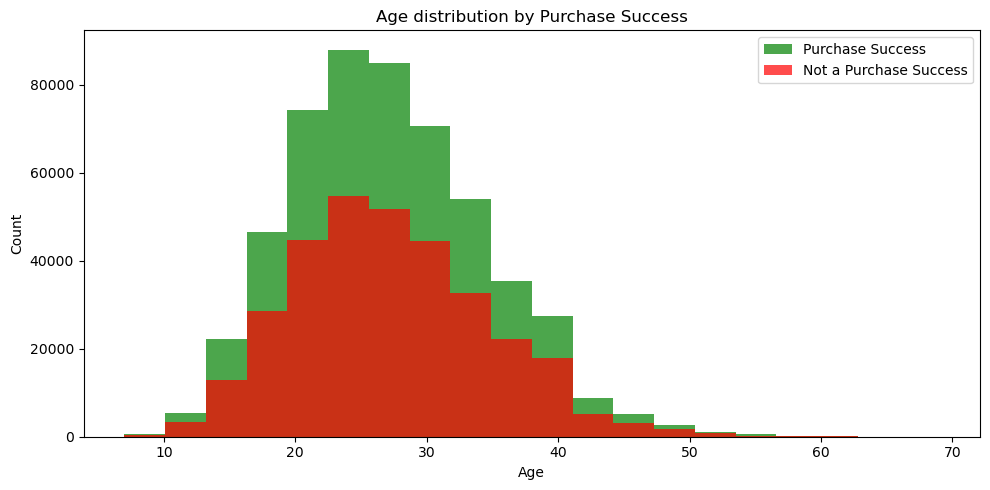

In [22]:
# Age distribution and its impact on purchasing behavior

import matplotlib.pyplot as py

plt.figure(figsize=(10, 5))

plt.hist(
    feature_df.filter(feature_df["purchase_success"] == 1)
    .select("age")
    .rdd.flatMap(lambda x: x)
    .collect(),
    bins=20,
    color="green",
    alpha=0.7,
    label="Purchase Success",
)
plt.hist(
    feature_df.filter(feature_df["purchase_success"] == 0)
    .select("age")
    .rdd.flatMap(lambda x: x)
    .collect(),
    bins=20,
    color="red",
    alpha=0.7,
    label="Not a Purchase Success",
)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution by Purchase Success")
plt.legend()

plt.tight_layout()
plt.show()

This graph shows successful and unsuccessful purchases based on customer age (green sections are successful, while red is unsuccessful). It is clear from the graph that a customer's age is a significant predictor of successful purchases.
With the green area highest between 20-30 years, younger customers have higher successful purchases, with a decrease in success as age increases. Similarly, the lowest successful purchases are for the age group 10-19 years. This is likely because this age group may not have access to credit cards or payment methods.
The above distribution could mean:

* Younger shoppers are more likely to browse online.
* Higher impulse shopping with younger shoppers
* Older shoppers are research-oriented and experienced shoppers.
* Factors like income, education level and employment further impact this

Overall, the distribution is not uniform. As people age, they tend to have more success with purchases. However, there is still variation within each age group.

<Figure size 1000x500 with 0 Axes>

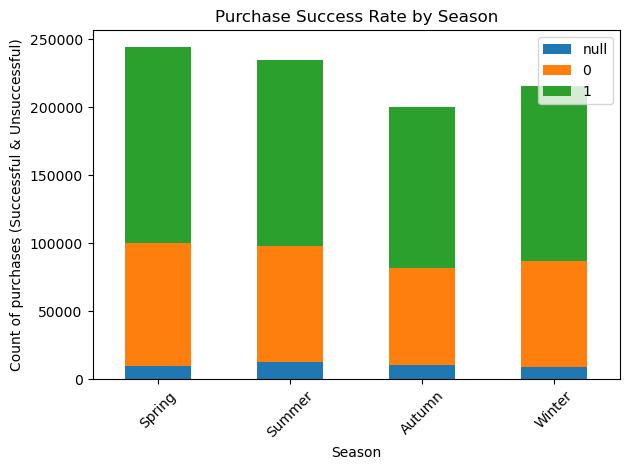

In [23]:
# seasonal purchase success rate

import matplotlib.pyplot as py
from pyspark.sql.functions import sum, count

season_purchase_rate = feature_df.groupBy("session_season", "purchase_success").count()

# pivoting data
piv_season_purchase_rate = (
    season_purchase_rate.groupBy("session_season")
    .pivot("purchase_success")
    .agg({"count": "sum"})
)

# converting to pandas
piv_season_purchase_rate_df = piv_season_purchase_rate.toPandas()

piv_season_purchase_rate_df.fillna(0, inplace=True)

# bar plot
plt.figure(figsize=(10, 5))
piv_season_purchase_rate_df.plot(kind="bar", x="session_season", stacked=True)
plt.xlabel("Season")
plt.ylabel("Count of purchases (Successful & Unsuccessful)")
plt.title("Purchase Success Rate by Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot above shows shopping trends by season. The graph shows that the purchases are overall higher in spring and summer. Along the same lines, the successful purchases do vary by season, but the rate of success is not impacted by season much.
There are several possible explanations for seasonal variation:
* People are more likely to browse and shop online during warmer months when there are more daylight hours.
* Winter shopping is more planned, such as gifts for holidays. 
Overall, there is a clear seasonal variation in purchase trends. This relationship will play a key role in the prediction model and influence the shopping characteristics of a customer.

In [24]:
# viewing the feature_df schema
feature_df.printSchema()

root
 |-- session_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- num_cat_highvalue: long (nullable = true)
 |-- num_cat_midvalue: long (nullable = true)
 |-- num_cat_lowvalue: long (nullable = true)
 |-- high_value_ratio: double (nullable = true)
 |-- low_value_ratio: double (nullable = true)
 |-- is_promotion: integer (nullable = true)
 |-- session_season: string (nullable = false)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- device_type: string (nullable = true)
 |-- home_location: string (nullable = true)
 |-- first_join_date: date (nullable = true)
 |-- purchase_success: integer (nullable = true)



## Part 2. Feature extraction and ML training <a class="anchor" name="part-2"></a>
In this section, you will need to use PySpark DataFrame functions and ML packages for data preparation, model building, and evaluation. Other ML packages, such as scikit-learn, would receive zero marks. Excessive usage of Spark SQL is discouraged.
### 2.1 Discuss the feature selection and prepare the feature columns

2.1.1 Based on the data exploration from 1.2 and considering the situation we have, discuss the importance of those features (For example, which features may be useless and should be removed, which feature has a great impact on the label column, which should be transformed) which features you are planning to use? Discuss the reasons for selecting them and how you create/transform them
- 300 words max for the discussion
- Please only use the provided data for model building
- You can create/add additional feature/column based on the dataset
- Hint - things to consider include whether to create more feature columns, whether to remove some columns, using the insights from the data exploration/domain knowledge/statistical models  

#### Feature Analysis

Features represent the input variables for a machine learning model, leveraging interdependencies among these variables to predict future attributes. In this scenario, we are looking to predict if a customer on an e-commerce platform will purchase based on the customer information and their browsing characteristics. (Brownlee, 2019)
*Analyzing the current features, we have in feature_df:*

**1. Features that will be retained and have an impact on the target column:**
* num_cat_highvalue, num_cat_midvalue, num_cat_lowvalue: They are historical actions of customers and indicate their patterns leading to a successful or unsuccessful purchase.
* Is_promotion: This is a binary indicator of promotional activities that strongly influences a purchasing decision. (Suryani & Syafarudin, 2021)
* Seasonality can influence buying/category patterns. This will help capture seasonal effects. (Understanding How Seasonal Changes Affect Consumer Connection, n.d.)
* Other demographic and device-related information provides insights into customer behaviour and allows to cluster customers with distinct shopping habits.

**2. Features that will be transformed:**
Two columns need transformation for the model – home_location and first_join_date:
* Converting the customer's location into a city tiering based on GDP and metropolitan cities to better understand their economic influence.
* Transforming the first_join_date to the number of days on the platform creates a continuous, numerical feature in days that can show customer loyalty and purchasing patterns over time.

**3. Features that will be deleted** - high_value_ratio, low_value_ratio: The above two columns might show low variability among the data. These ratios will also be highly correlated to existing features, leading to multicollinearity.

**4. Features that will be added:**
* Shipment fee: Customers might be sensitive to additional charges, and this binary indicator captures this cost factor. (What Impact Does Free Shipping Have on Online Retail Sales? - Rejoiner, n.d.)
* Payment method: The mode of payment can indicate the customer’s trust factor on the platform. (Greenacre & Akbar, 2019)
* Total amount: This column finds the quartiles of the historical payments at a session ID level. Customers with higher quartiles are more likely to repeat purchases.


2.1.2 Write code to create/transform the columns based on your discussion above
- Hint: You can use one dataframe for both two use cases(classification and k-mean later in part 3) since you can select your desired columns as the input and output for each use case. 


In [25]:
# transformation of first_join_date to days since the customer has been on the platform
from pyspark.sql import functions as f
from pyspark.sql.types import IntegerType

# defining a function to calculate the difference of days from current date to date of join
def days_since_join(first_join_date):
    current_date = F.current_date()
    customer_since = F.datediff(current_date, first_join_date)
    return round(customer_since)


# Adding it to the feature_df
feature_df = feature_df.withColumn(
    "customer_since", days_since_join(F.col("first_join_date")).cast(IntegerType())
)

# dropping fist_join_date
feature_df = feature_df.drop("first_join_date")

feature_df.show(5)

+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+-------------------+----------------+--------------+
|          session_id|customer_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|      home_location|purchase_success|customer_since|
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+-------------------+----------------+--------------+
|00005746-17ec-449...|      25255|                1|              20|              44|            1.54|          67.69|           0|        Spring|     M| 21|    Android|       Jakarta Raya|               0|          1196|
|0000a729-3de3-461...|       2607|                2|               0|               2|            50.0|     

In [26]:
# transformation of home_location to city-tiering in Indonesia for easy categorisation

# defining location tiers in Indonation
tier1_city = ["Jakarta Raya", "Kalimantan Timur"]  # Highest GDP and metropolitan
tier2_city = [
    "Sulawesi Selatan",
    "Jawa Barat",
    "Riau",
    "Jawa Timur",
    "Jawa Tengah",
]  # Growing GDP and medium economy

# creating a new column
feature_df = feature_df.withColumn(
    "city_tier",
    when(col("home_location").isin(tier1_city), "tier 1")
    .when(col("home_location").isin(tier1_city), "tier 2")
    .otherwise("tier 3"),
)

# removing the specific location column
feature_df = feature_df.drop("home_location")

# viewing the df
feature_df.show(5)

+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+
|          session_id|customer_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+
|00005746-17ec-449...|      25255|                1|              20|              44|            1.54|          67.69|           0|        Spring|     M| 21|    Android|               0|          1196|   tier 1|
|0000a729-3de3-461...|       2607|                2|               0|               2|            50.0|           50.0|           0|        Spring| 

In [27]:
# Adding Shipment fee as a feature to capture the cost impact
from pyspark.sql.functions import when, lit, col

shipment_df = transaction_df.withColumn(
    "shipment_fee_paid", when(col("shipment_fee") > 0, 1).otherwise(0)
)

# shipment_df.select("session_id", "shipment_fee_paid", "shipment_fee").show(5)

# joining this information with the feature_df
feature_df = feature_df.join(
    shipment_df.select("session_id", "shipment_fee_paid"), on="session_id", how="left"
)

feature_df.show(5)

+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+
|          session_id|customer_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+
|0000a729-3de3-461...|       2607|                2|               0|               2|            50.0|           50.0|           0|        Spring|     M| 18|    Android|               0|           764|   tier 1|                0|
|000128d0-c51c-411...|      18960|                2|               6|       

In [28]:
# adding payment method to identify premium consumers who use credit cards
feature_df = feature_df.join(
    transaction_df.select("session_id", "payment_method"), on="session_id", how="left"
)

feature_df.show(5)

+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+
|          session_id|customer_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+
|0000a729-3de3-461...|       2607|                2|               0|               2|            50.0|           50.0|           0|        Spring|     M| 18|    Android|               0|           764|   tier 1|                0|         Gopay|
|000128d0-c51c-4

In [29]:
# Adding total amount as a feature by taking it in quartiles
from pyspark.sql.functions import expr, col, when

# calculating percentiles of total_amount
quartiles = transaction_df.approxQuantile("total_amount", [0.25, 0.5, 0.75], 0.01)

# defining conditions for the quantiles
quartile_seg = [
    col("total_amount") <= quartiles[0],
    (col("total_amount") > quartiles[0]) & (col("total_amount") <= quartiles[1]),
    (col("total_amount") > quartiles[1]) & (col("total_amount") <= quartiles[2]),
    (col("total_amount") > quartiles[2]),
]

# setting labels for the quartiles segregated above
labels = ["Q1", "Q2", "Q3", "Q4"]

transaction_df = transaction_df.withColumn(
    "total_amount_quartile",
    when(quartile_seg[0], labels[0])
    .when(quartile_seg[1], labels[1])
    .when(quartile_seg[2], labels[2])
    .otherwise(labels[3]),
)

# understanding the quartile values
print(quartiles)
# amount_df = transaction_df.select("session_id", "total_amount_quartile")

# joining with feature_df
feature_df = feature_df.join(
    transaction_df.select("session_id", "total_amount_quartile"),
    on="session_id",
    how="left",
)

feature_df.show(5)

[203388.0, 300785.0, 504326.0]
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+
|          session_id|customer_id|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|high_value_ratio|low_value_ratio|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|total_amount_quartile|
+--------------------+-----------+-----------------+----------------+----------------+----------------+---------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+
|0000a729-3de3-461...|       2607|                2|               0|               2|            50.0|           50.0|           0|        Spring|     M| 18|    And

In [30]:
# dropping columns session_id, customer_id, high_value_ratio, low_value_ratio
feature_df_final = feature_df.drop(
    "session_id", "customer_id", "low_value_ratio", "high_value_ratio"
)

feature_df_final.printSchema()

root
 |-- num_cat_highvalue: long (nullable = true)
 |-- num_cat_midvalue: long (nullable = true)
 |-- num_cat_lowvalue: long (nullable = true)
 |-- is_promotion: integer (nullable = true)
 |-- session_season: string (nullable = false)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- device_type: string (nullable = true)
 |-- purchase_success: integer (nullable = true)
 |-- customer_since: integer (nullable = true)
 |-- city_tier: string (nullable = false)
 |-- shipment_fee_paid: integer (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- total_amount_quartile: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col

feature_df_final = feature_df_final.withColumn(
    "num_cat_highvalue", col("num_cat_highvalue").cast("double")
)
feature_df_final = feature_df_final.withColumn(
    "num_cat_midvalue", col("num_cat_midvalue").cast("double")
)
feature_df_final = feature_df_final.withColumn(
    "num_cat_lowvalue", col("num_cat_lowvalue").cast("double")
)

feature_df_final.printSchema()

In [33]:
from pyspark.sql.functions import col, count, isnan

# identifying the columns that have null have in the feature_df
feature_df_final.select(
    [
        count(when(isnan(c) | col(c).isNull(), c)).alias(c)
        for c in feature_df_final.columns
    ]
).show()

+-----------------+----------------+----------------+------------+--------------+------+-----+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+
|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|is_promotion|session_season|gender|  age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|total_amount_quartile|
+-----------------+----------------+----------------+------------+--------------+------+-----+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+
|                0|               0|               0|           0|             0| 42621|42621|      42621|           42621|         42621|        0|            42621|         42621|                42621|
+-----------------+----------------+----------------+------------+--------------+------+-----+-----------+----------------+--------------+---------+-----------------+--------------+---

In [32]:
from pyspark.sql.functions import col, count, isnan

# considering that the null values are not high in count and the nulls have a pattern of missing customer characteristics
# deleting browsing information of non-logged in customers
# dropping null values
feature_df_cleaned = (
    feature_df_final.na.drop()
)  # https://sparkbyexamples.com/pyspark/pyspark-drop-rows-with-null-values/

# ensuring the columns that have null have in the feature_df
feature_df_cleaned.select(
    [
        count(when(isnan(c) | col(c).isNull(), c)).alias(c)
        for c in feature_df_cleaned.columns
    ]
).show()

+-----------------+----------------+----------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+
|num_cat_highvalue|num_cat_midvalue|num_cat_lowvalue|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|total_amount_quartile|
+-----------------+----------------+----------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+
|                0|               0|               0|           0|             0|     0|  0|          0|               0|             0|        0|                0|             0|                    0|
+-----------------+----------------+----------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+-------------

In [34]:
# understanding the impact of deleting rows
feature_df_cleaned.printSchema()
before_row_count = feature_df.count()
row_count = feature_df_cleaned.count()

print(before_row_count)
print(row_count)

root
 |-- num_cat_highvalue: long (nullable = true)
 |-- num_cat_midvalue: long (nullable = true)
 |-- num_cat_lowvalue: long (nullable = true)
 |-- is_promotion: integer (nullable = true)
 |-- session_season: string (nullable = false)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- device_type: string (nullable = true)
 |-- purchase_success: integer (nullable = true)
 |-- customer_since: integer (nullable = true)
 |-- city_tier: string (nullable = false)
 |-- shipment_fee_paid: integer (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- total_amount_quartile: string (nullable = true)

895203
852582


### 2.2 Preparing Spark ML Transformers/Estimators for features, labels, and models  <a class="anchor" name="2.2"></a>

**2.2.1 Write code to create Transformers/Estimators for transforming/assembling the columns you selected above in 2.1, and create ML model Estimators for Random Forest (RF) and Gradient-boosted tree (GBT) model.
Please DO NOT fit/transform the data yet**

In [35]:
# defining the categorical columns
category_Inputcols = [
    "session_season",
    "gender",
    "device_type",
    "city_tier",
    "payment_method",
    "total_amount_quartile",
]
# defining the numeric columns
numeric_Inputcols = [
    "num_cat_highvalue",
    "num_cat_midvalue",
    "num_cat_lowvalue",
    "is_promotion",
    "age",
    "customer_since",
    "shipment_fee_paid",
]
# defining the label columns
target_col = "purchase_success"

In [36]:
from pyspark.ml.feature import StringIndexer

# defining labels for the columns for identification
outputCols = [f"{x}_index" for x in category_Inputcols]

# using the string Indexer for the category columns
inputIndexer = StringIndexer(inputCols=category_Inputcols, outputCols=outputCols)

print(category_Inputcols)
print(outputCols)

['session_season', 'gender', 'device_type', 'city_tier', 'payment_method', 'total_amount_quartile']
['session_season_index', 'gender_index', 'device_type_index', 'city_tier_index', 'payment_method_index', 'total_amount_quartile_index']


In [37]:
from pyspark.ml.feature import OneHotEncoder

inputCols_OHE = [x for x in outputCols]
# adding _vec to identify these columns
outputCols_OHE = [f"{x}_vec" for x in category_Inputcols]

encoder = OneHotEncoder(inputCols=inputCols_OHE, outputCols=outputCols_OHE)

print(inputCols_OHE)
print(outputCols_OHE)

['session_season_index', 'gender_index', 'device_type_index', 'city_tier_index', 'payment_method_index', 'total_amount_quartile_index']
['session_season_vec', 'gender_vec', 'device_type_vec', 'city_tier_vec', 'payment_method_vec', 'total_amount_quartile_vec']


In [38]:
from pyspark.ml.feature import VectorAssembler

# defining the input and output columns for assembling
InputCols = outputCols_OHE
assembler_Inputs = outputCols_OHE + numeric_Inputcols
# executing the vector assembler
assembler = VectorAssembler(inputCols=assembler_Inputs, outputCol="features")
print(assembler_Inputs)

['session_season_vec', 'gender_vec', 'device_type_vec', 'city_tier_vec', 'payment_method_vec', 'total_amount_quartile_vec', 'num_cat_highvalue', 'num_cat_midvalue', 'num_cat_lowvalue', 'is_promotion', 'age', 'customer_since', 'shipment_fee_paid']


**2.2.2. Write code to include the above Transformers/Estimators into two pipelines.
Please DO NOT fit/transform the data yet**

In [39]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

# defining stages for the pipeline
stage_1 = inputIndexer
stage_2 = encoder
stage_3 = assembler

# random forest pipeline setting
rf_classifier = RandomForestClassifier(
    labelCol=target_col, featuresCol="features", numTrees=100
)
pipeline_stages_rf = Pipeline(stages=[stage_1, stage_2, stage_3, rf_classifier])

# gradient boosted tree pipeline
gb_classifier = GBTClassifier(
    labelCol=target_col, featuresCol="features", maxIter=10, seed=42
)
pipeline_stages_gb = Pipeline(stages=[stage_1, stage_2, stage_3, gb_classifier])

### 2.3 Preparing the training data and testing data  
Write code to split the data for training and testing purposes.  
Note: Due to the large size of the dataset, you can choose to use random sampling (say 20% of the dataset) and do a train/test split; or use one year of data for training and another year for testing. 

In [40]:
# splitting the data set - 80% training and 20% for testing
training_data, testing_data = feature_df_cleaned.randomSplit([0.8, 0.2], seed=42)
# understanding the split by count
print("Training Dataset count: " + str(training_data.count()))
print("Test Dataset count: " + str(testing_data.count()))

Training Dataset count: 682131
Test Dataset count: 170451


### 2.4 Training and evaluating models  
2.4.1 Write code to use the corresponding ML Pipelines to train the models on the training data from 2.3. And then use the trained models to predict the testing data from 2.3

In [41]:
##Training the random forest classifier

# Dataframe for for Random Forest model
rf_model = pipeline_stages_rf.fit(training_data)

# Dataframe fir for Gradient boosted model
gbt_model = pipeline_stages_gb.fit(training_data)

In [42]:
# making predictions in the random forest model
rf_predictions = rf_model.transform(testing_data)
rf_predictions.select("purchase_success", "features", "prediction", "probability").show(
    5
)

+----------------+--------------------+----------+--------------------+
|purchase_success|            features|prediction|         probability|
+----------------+--------------------+----------+--------------------+
|               0|(20,[3,4,6,13,15,...|       1.0|[0.39730708039966...|
|               1|(20,[3,4,5,9,12,1...|       1.0|[0.40697278214166...|
|               1|(20,[3,4,5,6,11,1...|       1.0|[0.39548698021291...|
|               1|(20,[3,5,8,13,15,...|       1.0|[0.40363861532036...|
|               0|(20,[3,4,5,8,10,1...|       1.0|[0.39166340596218...|
+----------------+--------------------+----------+--------------------+
only showing top 5 rows



In [43]:
# making predictions in the gradient boosted model
gbt_prediction = gbt_model.transform(testing_data)
gbt_prediction.select("purchase_success", "features", "prediction", "probability").show(
    5
)

+----------------+--------------------+----------+--------------------+
|purchase_success|            features|prediction|         probability|
+----------------+--------------------+----------+--------------------+
|               0|(20,[3,4,6,13,15,...|       1.0|[0.40811051894683...|
|               1|(20,[3,4,5,9,12,1...|       1.0|[0.39288272585916...|
|               1|(20,[3,4,5,6,11,1...|       1.0|[0.40773973611810...|
|               1|(20,[3,5,8,13,15,...|       1.0|[0.40184356694838...|
|               0|(20,[3,4,5,8,10,1...|       1.0|[0.40682143826764...|
+----------------+--------------------+----------+--------------------+
only showing top 5 rows



2.4.2 For both models(RF and GBT) and testing data, write code to display the count of TP/TN/FP/FN. Compute the AUC, accuracy, recall, and precision for the above-threshold/below-threshold label from each model testing result using pyspark MLlib/ML APIs.
- Draw a ROC plot.
- Discuss which one is the better model(no word limit, please keep it concise)

In [44]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.sql.functions import expr, when, col
import matplotlib.pyplot as plt

# calculating the above mentioned metrics by defining a function
def model_eval_metrics(
    model, target_col="purchase_success", prediction_col="prediction", threshold=0.5
):
    true_positive = model.filter(
        (col(target_col) == 1) & (col(prediction_col) == 1)
    ).count()
    true_negative = model.filter(
        (col(target_col) == 0) & (col(prediction_col) == 0)
    ).count()
    false_positive = model.filter(
        (col(target_col) == 0) & (col(prediction_col) == 1)
    ).count()
    false_negative = model.filter(
        (col(target_col) == 1) & (col(prediction_col) == 0)
    ).count()

    # Area under the curve(AUC) calculation
    evaluator = BinaryClassificationEvaluator(labelCol=target_col)
    curve = evaluator.evaluate(model)

    # calculating accuracy
    # taking count of predictions made in the model
    accuracy = (true_positive + true_negative) / (
        true_positive + true_negative + false_positive + false_negative
    )

    # calculating recall - model's ability to detect positives. Higher the recall, more positives detected
    recall = (true_positive) / (true_positive + false_negative)

    # Calculating how precise the model is:
    precision = true_positive / (true_positive + false_positive)

    return {
        "True Positives": true_positive,
        "True Negatives": true_negative,
        "False Positives": false_positive,
        "False Negatives": false_negative,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "AUC": curve,
    }


# evaluation of Random Forest Model
rf_metrics = model_eval_metrics(
    rf_predictions, target_col="purchase_success", prediction_col="prediction"
)
# displaying the result
print("Random Forest Model metrics:")
# printing the metrics
for metric, value in rf_metrics.items():
    print(f"{metric}: {value}")


# evaluation of Gradient-Boosted Tree model
gbt_metrics = model_eval_metrics(
    gbt_prediction, target_col="purchase_success", prediction_col="prediction"
)
# displaying the result
print("\nGradient-Boosted Tree Model metrics:")
# printing the metrics
for metric, value in gbt_metrics.items():
    print(f"{metric}: {value}")

Random Forest Model metrics:
True Positives: 103444
True Negatives: 32387
False Positives: 32313
False Negatives: 2307
Accuracy: 0.7968917753489273
Recall: 0.9781846034552865
Precision: 0.7619791244650368
AUC: 0.838621874103755

Gradient-Boosted Tree Model metrics:
True Positives: 104602
True Negatives: 32280
False Positives: 32420
False Negatives: 1149
Accuracy: 0.8030577702682883
Recall: 0.9891348545167422
Precision: 0.7633956590912409
AUC: 0.8621646626468519


#### Plotting the ROC

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


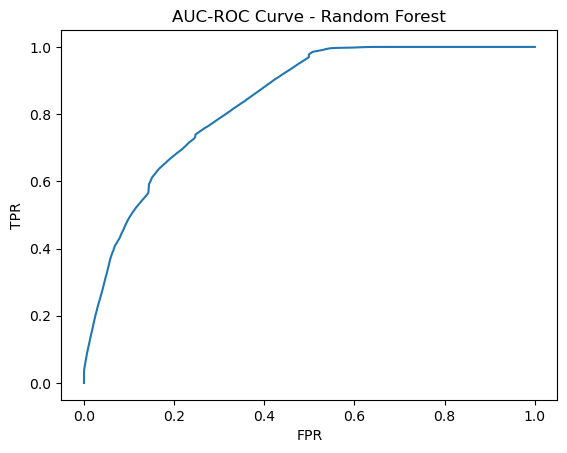

In [45]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

##Using the code provided in the lab to create the class ROCMetrics for visualising ROC curve
# defining a class to be able to calculate rate for plotting of ROC curve
class ROCMetrics(
    BinaryClassificationMetrics
):  # (How Can We Calculate ROC AUC for Classification Algorithm such as Random Forest?, n.d.)
    def __init__(self, *args):
        super(ROCMetrics, self).__init__(*args)

    # defining the function for a list of thresholds
    def _to_list(self, rdd):
        points = []
        # appending scores to the list
        for row in rdd.collect():
            points += [(float(row._1()), float(row._2()))]
        return points

    # identifying the curve and
    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)


# Plugging in the random forest dataframe from the testing dataset
estimation = rf_predictions.select("purchase_success", "probability").rdd.map(
    lambda row: (float(row["probability"][1]), float(row["purchase_success"]))
)
# extracting points for plotting
points = ROCMetrics(estimation).get_curve("roc")

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title("AUC-ROC Curve - Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(x_val, y_val)

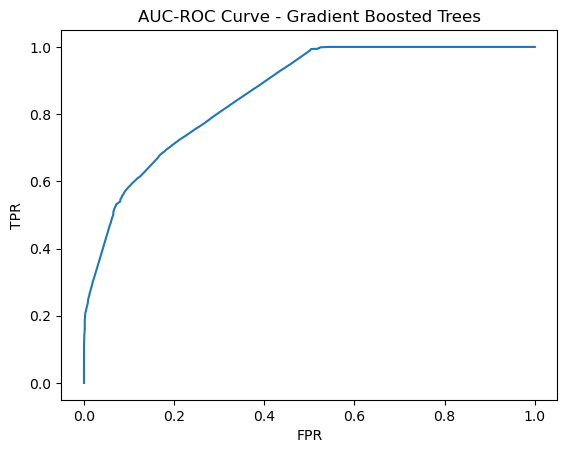

In [46]:
# Plugging in the random forest dataframe from the testing dataset
estimation = gbt_prediction.select("purchase_success", "probability").rdd.map(
    lambda row: (float(row["probability"][1]), float(row["purchase_success"]))
)
# extracting points for plotting
points = ROCMetrics(estimation).get_curve("roc")

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title("AUC-ROC Curve - Gradient Boosted Trees")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(x_val, y_val)

#### Model Interpretation

From the above metric comparisons, we notice that the Gradient-boosted trees outperform the random forest model in terms of accuracy. The higher accuracy states that the model predicts accurately more often. The higher recall suggests that it captures a larger proportion of true positive cases and is more reliable.
The precision for both models is similar, but the gradient-boosted tree has a marginally higher AUC, showing better discrimination among the data points.

Thus, the gradient-boosted tree is the better model with higher accuracy and recall.

2.4.3 Save the better model, we will need this for Part B of assignment 2.  
(note: You may need to go through a few training loops or use more data to create a better-performing model.)

In [48]:
# defining the file path to save the model
file_path = "FinalModelA2A/GBT_Model"
gbt_model.save(file_path)

### Part 3. Customer Segmentation and Knowledge sharing with K-Mean <a class="anchor" name="part-3"></a>  
Please see the specification for this task and add code/markdown cells.

In [49]:
# understanding the feature df previosuly created
feature_df.printSchema()

root
 |-- session_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- num_cat_highvalue: long (nullable = true)
 |-- num_cat_midvalue: long (nullable = true)
 |-- num_cat_lowvalue: long (nullable = true)
 |-- high_value_ratio: double (nullable = true)
 |-- low_value_ratio: double (nullable = true)
 |-- is_promotion: integer (nullable = true)
 |-- session_season: string (nullable = false)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- device_type: string (nullable = true)
 |-- purchase_success: integer (nullable = true)
 |-- customer_since: integer (nullable = true)
 |-- city_tier: string (nullable = false)
 |-- shipment_fee_paid: integer (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- total_amount_quartile: string (nullable = true)



Creating new features for customer segmentation since it needs to be aggregated at a customer_id level

In [50]:
from pyspark.sql.functions import col, sum, count

# preparing the feature_df for customer segmentation

# grouping by customer_id and aggregating the actions and no. of sessions
customer_df = feature_df.groupBy("customer_id").agg(
    sum("num_cat_highvalue").alias("total_high_value"),
    sum("num_cat_midvalue").alias("total_mid_value"),
    sum("num_cat_lowvalue").alias("total_low_value"),
    sum(
        col("num_cat_highvalue") + col("num_cat_midvalue") + col("num_cat_lowvalue")
    ).alias("total_actions"),
    count("session_id").alias("no_session_id"),
)

# calculating the total
customer_df = customer_df.withColumn(
    "high_level_ratio",
    (col("total_high_value") / col("total_actions") * 100).cast("integer"),
)
customer_df = customer_df.withColumn(
    "low_level_ratio",
    (col("total_low_value") / col("total_actions") * 100).cast("integer"),
)

feature_df = feature_df.join(
    customer_df.select(
        "customer_id", "high_level_ratio", "low_level_ratio", "no_session_id"
    ),
    on="customer_id",
    how="left",
)

# dropping these rows
feature_df = feature_df.drop(
    "num_cat_highvalue",
    "num_cat_midvalue",
    "num_cat_lowvalue",
    "high_value_ratio",
    "low_value_ratio",
)

feature_df.show(5)

+-----------+--------------------+------------+--------------+------+----+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+----------------+---------------+-------------+
|customer_id|          session_id|is_promotion|session_season|gender| age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|total_amount_quartile|high_level_ratio|low_level_ratio|no_session_id|
+-----------+--------------------+------------+--------------+------+----+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+----------------+---------------+-------------+
|      91166|0002d4fd-9985-4fd...|           1|        Spring|     M|  28|    Android|               1|          2408|   tier 3|                1|           OVO|                   Q4|              32|             45|           78|
|       6663|00080cfb-06ab-4db...|           0|        Spring|     M|  26|  

In [51]:
# calculating the last recorded age of the customer, their dependability on promotions and their payment methods used (mainlt, the credit card)
from pyspark.sql.functions import max

age_df = feature_df.groupBy("customer_id").agg(max("age").alias("max_age"))
feature_df = feature_df.join(age_df, on="customer_id", how="left")

promo_count_df = transaction_df.groupBy("customer_id").agg(
    count(when(col("promo_code").isNotNull(), True)).alias("promo_count"),
    count(when(col("payment_method") == "Credit Card", True)).alias(
        "credit_card_transactions"
    ),
    count(when(col("payment_method") != "Credit Card", True)).alias(
        "other_payment_transactions"
    ),
)

# adding this to the feature_df
feature_df = feature_df.join(promo_count_df, "customer_id", "left")
feature_df.show(5)

+-----------+--------------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+
|customer_id|          session_id|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|total_amount_quartile|high_level_ratio|low_level_ratio|no_session_id|max_age|promo_count|credit_card_transactions|other_payment_transactions|
+-----------+--------------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+
|       2607|0000a729-3de3-461...|           0|        Spring|     M| 18|    Android|         

In [52]:
# Adding total amount and using the method of quartiles as used before
from pyspark.sql.functions import expr, col, when
from pyspark.sql import functions as f

# calculating percentiles of total_amount at a customer ID level
transaction_df = transaction_df.groupBy("customer_id").agg(
    F.sum("total_amount").alias("final_spend")
)

quartiles = transaction_df.approxQuantile("final_spend", [0.25, 0.5, 0.75], 0.01)

# defining conditions for the quantiles
quartile_seg = [
    col("final_spend") <= quartiles[0],
    (col("final_spend") > quartiles[0]) & (col("final_spend") <= quartiles[1]),
    (col("final_spend") > quartiles[1]) & (col("final_spend") <= quartiles[2]),
    (col("final_spend") > quartiles[2]),
]

# setting labels for the quartiles segregated above
labels = ["Q1", "Q2", "Q3", "Q4"]

transaction_df = transaction_df.withColumn(
    "final_spend_quartile",
    when(quartile_seg[0], labels[0])
    .when(quartile_seg[1], labels[1])
    .when(quartile_seg[2], labels[2])
    .otherwise(labels[3]),
)

print(quartiles)
# amount_df = transaction_df.select("session_id", "total_amount_quartile")

# joining with feature_df
feature_df = feature_df.join(
    transaction_df.select("customer_id", "final_spend_quartile"),
    on="customer_id",
    how="left",
)

feature_df.show(5)

[787895.0, 3017411.0, 9775251.0]
+-----------+--------------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|customer_id|          session_id|is_promotion|session_season|gender|age|device_type|purchase_success|customer_since|city_tier|shipment_fee_paid|payment_method|total_amount_quartile|high_level_ratio|low_level_ratio|no_session_id|max_age|promo_count|credit_card_transactions|other_payment_transactions|final_spend_quartile|
+-----------+--------------------+------------+--------------+------+---+-----------+----------------+--------------+---------+-----------------+--------------+---------------------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------

In [53]:
# deleting unnecessary columns
feature_df = feature_df.drop(
    "session_id",
    "is_promotion",
    "session_season",
    "age",
    "purchase_success",
    "shipment_fee_paid",
    "payment_method",
    "total_amount_quartile",
)

feature_df.show(5)

+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|customer_id|gender|device_type|customer_since|city_tier|high_level_ratio|low_level_ratio|no_session_id|max_age|promo_count|credit_card_transactions|other_payment_transactions|final_spend_quartile|
+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|       2607|     M|    Android|           764|   tier 1|              40|             40|            3|     18|          0|                       0|                         3|                  Q2|
|      18960|     F|    Android|          2052|   tier 3|              34|             43|           25|     23|         12|                       0|                        25|                  Q4|
|      545

In [54]:
# remving duplicate rows
feature_df = feature_df.dropDuplicates(["customer_id"])

feature_df.show(5)

+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|customer_id|gender|device_type|customer_since|city_tier|high_level_ratio|low_level_ratio|no_session_id|max_age|promo_count|credit_card_transactions|other_payment_transactions|final_spend_quartile|
+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|       null|  null|       null|          null|   tier 3|            null|           null|         null|   null|       null|                    null|                      null|                null|
|        100|     F|    Android|          2597|   tier 3|              28|             57|            2|     32|          1|                       2|                         0|                  Q1|
|      100

In [55]:
from pyspark.sql.functions import col, count, isnan

before_row_count = feature_df.count()
print(before_row_count)

# dropping null values
feature_df_segment = (
    feature_df.na.drop()
)  # https://sparkbyexamples.com/pyspark/pyspark-drop-rows-with-null-values/
feature_df_segment.show(5)

# ensuring the columns that have null have in the feature_df
feature_df_segment.select(
    [
        count(when(isnan(c) | col(c).isNull(), c)).alias(c)
        for c in feature_df_segment.columns
    ]
).show()

after_row_count = feature_df_segment.count()
print(after_row_count)

50705
+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|customer_id|gender|device_type|customer_since|city_tier|high_level_ratio|low_level_ratio|no_session_id|max_age|promo_count|credit_card_transactions|other_payment_transactions|final_spend_quartile|
+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+
|        100|     F|    Android|          2597|   tier 3|              28|             57|            2|     32|          1|                       2|                         0|                  Q1|
|      10000|     M|    Android|           798|   tier 3|              20|             57|            8|     18|          1|                       7|                         1|                  Q3|
|   

In [56]:
# understanding the schema before clustering
feature_df_segment.printSchema()

root
 |-- customer_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- device_type: string (nullable = true)
 |-- customer_since: integer (nullable = true)
 |-- city_tier: string (nullable = false)
 |-- high_level_ratio: integer (nullable = true)
 |-- low_level_ratio: integer (nullable = true)
 |-- no_session_id: long (nullable = true)
 |-- max_age: integer (nullable = true)
 |-- promo_count: long (nullable = true)
 |-- credit_card_transactions: long (nullable = true)
 |-- other_payment_transactions: long (nullable = true)
 |-- final_spend_quartile: string (nullable = true)



#### Finding Optimum k value using Silhouette score

In [58]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline

# String Indexing for categorical columns
indexed = StringIndexer(
    inputCols=["gender", "device_type", "city_tier", "final_spend_quartile"],
    outputCols=[
        "gender_idx",
        "device_type_idx",
        "city_tier_idx",
        "final_spend_quartile_idx",
    ],
)

# One Hot Encoding the indexed columns
encoded = OneHotEncoder(
    inputCols=[
        "gender_idx",
        "device_type_idx",
        "city_tier_idx",
        "final_spend_quartile_idx",
    ],
    outputCols=[
        "gender_vec",
        "device_type_vec",
        "city_tier_vec",
        "final_spend_quartile_vec",
    ],
)

# Assembling the vector for all columns
vec_assembler = VectorAssembler(
    inputCols=[
        "gender_vec",
        "device_type_vec",
        "city_tier_vec",
        "final_spend_quartile_vec",
        "customer_since",
        "high_level_ratio",
        "low_level_ratio",
        "no_session_id",
        "max_age",
        "promo_count",
        "credit_card_transactions",
        "other_payment_transactions",
    ],
    outputCol="features",
)

# setting the pipeline
pipeline = Pipeline(stages=[indexed, encoded, vec_assembler])
model = pipeline.fit(feature_df_segment)
data = model.transform(feature_df_segment)

# computing Silhouette score
model_evaluator = ClusteringEvaluator()

# Empty array to append all the scores
array_sil = []
# running a loop to calculate scores for different k values
for k in range(2, 10):
    kmeans = KMeans(featuresCol="features", k=k)
    optimum_mod = kmeans.fit(data)
    predictions = optimum_mod.transform(data)
    sil_score = model_evaluator.evaluate(predictions)
    array_sil.append(sil_score)
    print("No. of clusters: ", k, "Silhouette score: ", sil_score)

No. of clusters:  2 Silhouette score:  0.7908364123062905
No. of clusters:  3 Silhouette score:  0.7396656476503876
No. of clusters:  4 Silhouette score:  0.7259811834439855
No. of clusters:  5 Silhouette score:  0.7170738629623401
No. of clusters:  6 Silhouette score:  0.6971909813244906
No. of clusters:  7 Silhouette score:  0.6833676086319561
No. of clusters:  8 Silhouette score:  0.676300124903955
No. of clusters:  9 Silhouette score:  0.6563459021387948


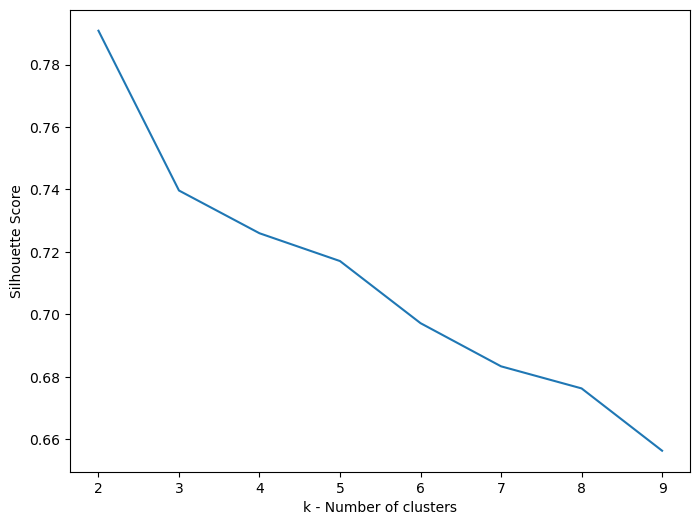

In [59]:
# visualising the score
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1, figsize=(8, 6))
axis.plot(range(2, 10), array_sil)

axis.set_xlabel("k - Number of clusters")
axis.set_ylabel("Silhouette Score")

plt.show()

Based on the above model, it is evident that the most optimum k value is 2!

#### Feature Engineering

In [60]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# creating k means model estimator with 4 clusters
kmeans_model = KMeans(featuresCol="features", k=2)

# pipeline and model
kmeans_pipeline = Pipeline(stages=[indexed, encoded, vec_assembler, kmeans_model])
model_pipeline = kmeans_pipeline.fit(feature_df_segment)

# predicting
predictions = model_pipeline.transform(feature_df_segment)
predictions.show()

+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+----------+---------------+-------------+------------------------+-------------+---------------+-------------+------------------------+--------------------+----------+
|customer_id|gender|device_type|customer_since|city_tier|high_level_ratio|low_level_ratio|no_session_id|max_age|promo_count|credit_card_transactions|other_payment_transactions|final_spend_quartile|gender_idx|device_type_idx|city_tier_idx|final_spend_quartile_idx|   gender_vec|device_type_vec|city_tier_vec|final_spend_quartile_vec|            features|prediction|
+-----------+------+-----------+--------------+---------+----------------+---------------+-------------+-------+-----------+------------------------+--------------------------+--------------------+----------+---------------+-------------+------------------------+-------

#### Understanding the centroids

In [61]:
from pyspark.ml.clustering import KMeansModel

# analysing centroids for the numerical columns

columns = [
    "customer_since",
    "high_level_ratio",
    "low_level_ratio",
    "no_session_id",
    "max_age",
    "promo_count",
    "credit_card_transactions",
    "other_payment_transactions",
]

centroids_df = predictions.groupBy("prediction").avg(*columns)

centroids_df.show()

+----------+-------------------+---------------------+--------------------+------------------+------------------+------------------+-----------------------------+-------------------------------+
|prediction|avg(customer_since)|avg(high_level_ratio)|avg(low_level_ratio)|avg(no_session_id)|      avg(max_age)|  avg(promo_count)|avg(credit_card_transactions)|avg(other_payment_transactions)|
+----------+-------------------+---------------------+--------------------+------------------+------------------+------------------+-----------------------------+-------------------------------+
|         1|  913.2707688987988|    26.61317701215565|   50.54754369560526| 11.38146443213695|27.289541825505285| 3.186254765158599|            4.068366539595771|              7.313097892541178|
|         0| 1993.4510000873438|    29.79504760241069|   47.95025766442484| 23.41291815879116| 27.25674731417591|10.391213206393571|            8.143112935627565|             15.269805223163596|
+----------+-------------

#### Recommendations on Customer segments

As previously analyzed through the k-means model, the most optimized clustering for the MOTH customer base is 2 clusters. Further, we have analyzed the optimum clusters from the data based on the kmeans model.

Interpretation of the centroid table:
* Each row in the above table represents a cluster identified by the prediction column.
* Based on the data, customers can be segmented based on the below averages:

| Clustering factor | Cluster 0 | Cluster 1 |
| --- | --- | --- |
| Date of account creation | ~2000 days | ~1000 days |
| --- | --- | --- |
| High level actions (Add to cart or Promo actions) | ~30 actions | ~1000 actions |
| --- | --- | --- |
| Low level actions (Search or Viewing products) | ~48 actions | ~50 actions |
| --- | --- | --- |
| No. of sessions | ~23 sessions | ~10 sessions |
| --- | --- | --- |
| Age | ~28 years | ~28 years |
| --- | --- | --- |
| credit card transactions | ~8 transactions | ~4 transactions |
| --- | --- | --- |
| other payment type transactions | ~15 transactions | ~7 transactions |

	
Based on the above table, the possible segmentations can be:
| Suggested Segmenting Factor | Segment 1 | Segment 2 |
| --- | --- | --- |
| Customer experience | Older loyal customers (above 2000 days) with more credit card transactions | New customers (1000 days and lesser) and no prominant payment methods |
| --- | --- | --- |
| Shopping Experience | More high-level actions and impulse buyers | Higher low level actions |
| --- | --- | --- |
| Age & Promotions | Older people with high promotional activity | Younger people with fewer promotional activities |

Overall, one segment can have older customers who make more credit card transactions and engage in more promotional activities while the other segment can be newer customers with fewer promotional activities. More suggesstions can be made based on the categorical features.
	
	


### Part 4: Data Ethics, Privacy, and Security <a class="anchor" name="part-4"></a>  
Please see the specification for this task and add markdown cells(word limit: 500).

### Topic: Big Data ethics in the healthcare Industry

Big Data, as specified in this unit, can be defined as dealing with tremendous amounts of large datasets intended for computations, analysis to conduct advanced research and identifying new trends. Specifically, in the medical domain, Big data has had prominent importance as it is a key tool for advancements in medical care. For instance, algorithms that have been trained using these massive datasets and image processing have led to enhanced abilities to detect diabetic retinopathy and skin cancer. (Howe III & Elenberg, 2020)

Despite all these gains, Big data research in the medical field has raised multiple ethical concerns. These issues mainly stem from the need for large amounts of personal patient information and the tendency of analytical programs to reflect human error. Analyzing a specific case of research conducted by the University of Pennsylvania Health System, which aims to develop predictive analytics to diagnose deadly illnesses before they occur, we can see how ethics can be positively integrated into healthcare. Using big data for early disease detection, they ensured that the results were shared with clinical staff only through responsible communication, data was secured through structured warehousing and safe cloud storage and the patient’s well-being was prioritized. It is also key to note that even though multiple predictive models made the early predictions, domain experts were consulted before any actions were taken. This speaks volumes of how ethics was a key consideration in the study. (Penn Health Sees Big Data as Life Saver, n.d.)

On the contrary, a big data project by Google named ‘Nightingale’ is an example of how ethics was handled negatively. This project aimed to leverage big data and machine learning for healthcare by analyzing the health data of millions of patients to improve patient care.
The primary concern in this project was that millions of people's sensitive information and habits (shared with Google) were utilized for this project without their consent. Additionally, this data was being shared with big tech companies and was not stored securely. (Schneble et al., 2020)

From the above examples, we can understand that in the big data domain, technical expertise alone is insufficient in big data. Adhering to ethical standards and regulations is equally critical for responsibly collecting, storing, and communicating sensitive data.

Considering the above-stated ethical practices, I believe balancing technological advancements and ethical responsibilities is a challenge in today's fast-paced era. Below are some considerations to achieve a sound balance:
* Strong data protection laws must be established and enforced by the regulatory bodies. These laws should always be prioritized, even when executing small-scale projects like this assignment.
* Organizations should always maintain transparency about their data practices.
* Developing AI or machine learning models using big data should be designed to eliminate biases and unethical use.
* Domain experts and big data processing should always go together and take responsibility for conducting ethical checks regularly.

## References:
Please add your references below:

Brownlee, J. (2019, November 26). How to Choose a Feature Selection Method For Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
Greenacre, L., & Akbar, S. (2019). The impact of payment method on shopping behaviour among low income consumers. Journal of Retailing and Consumer Services, 47, 87–93. https://doi.org/10.1016/j.jretconser.2018.11.004
How can we calculate ROC AUC for classification algorithm such as random forest? (n.d.). Cross Validated. Retrieved September 24, 2023, from https://stats.stackexchange.com/questions/188616/how-can-we-calculate-roc-auc-for-classification-algorithm-such-as-random-forest
Howe III, E. G., & Elenberg, F. (2020). Ethical Challenges Posed by Big Data. Innovations in Clinical Neuroscience, 17(10-12), 24–30. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7819582/
Penn Health Sees Big Data as Life Saver. (n.d.). Health Data Management. Retrieved September 24, 2023, from https://www.healthdatamanagement.com/articles/penn-health-sees-big-data-as-life-saver
Schneble, C. O., Elger, B. S., & Shaw, D. M. (2020). Google’s Project Nightingale highlights the necessity of data science ethics review. EMBO Molecular Medicine, 12(3). https://doi.org/10.15252/emmm.202012053
Suryani, I., & Syafarudin, A. (2021). The Effect of Sales Promotion on Purchasing Decisions. Ilomata International Journal of Tax and Accounting, 2(2), 122–133. https://doi.org/10.52728/ijtc.v2i2.216
Understanding How Seasonal Changes Affect Consumer Connection. (n.d.). Blog.neongoldfish.com. https://blog.neongoldfish.com/seasonal-marketing-changes
What Impact Does Free Shipping Have on Online Retail Sales? - Rejoiner. (n.d.). Www.rejoiner.com. https://www.rejoiner.com/resources/free-shipping-online-retail-sales#:~:text=We
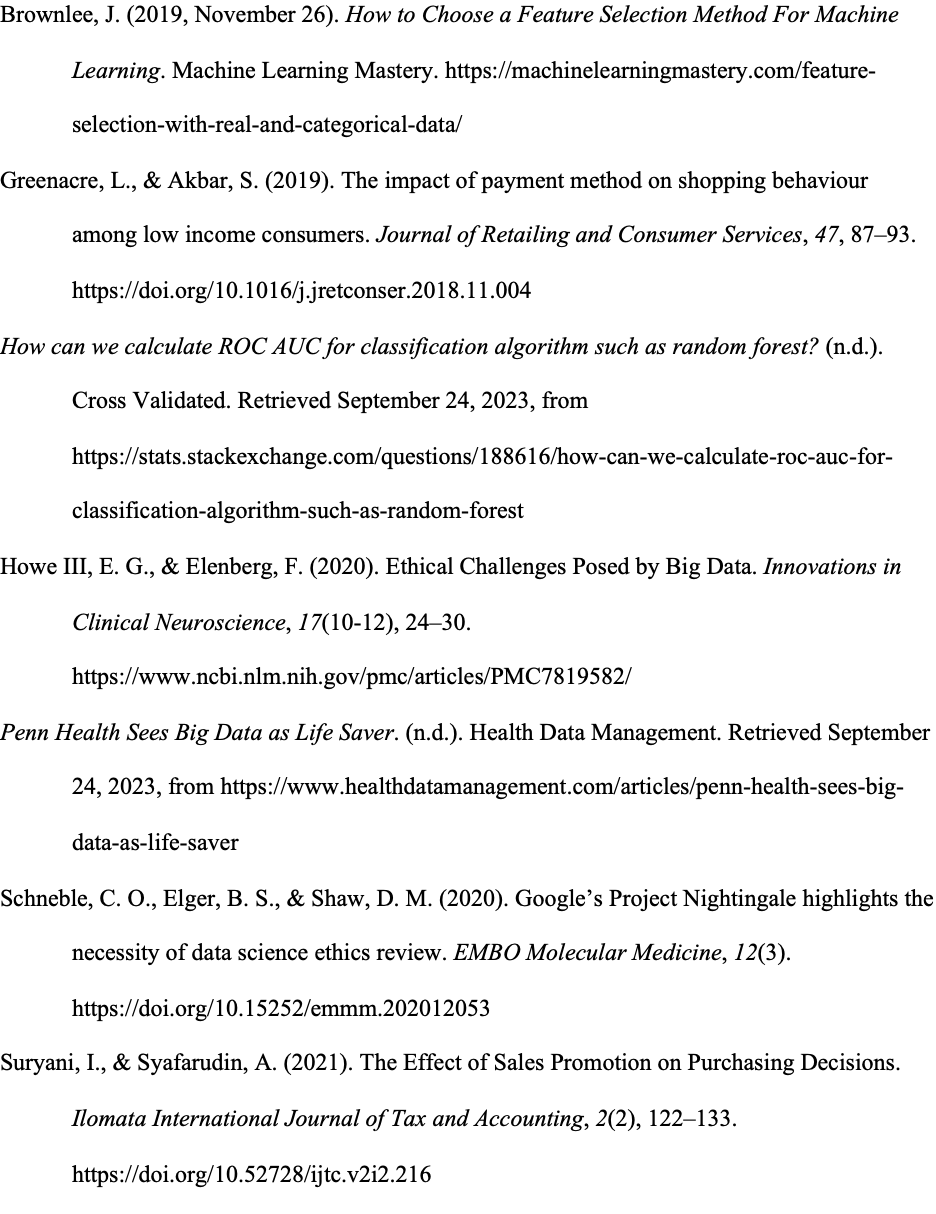